In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [3]:
test_datagen = ImageDataGenerator(rescale= 1./255)


In [9]:
x_train = train_datagen.flow_from_directory(r"C:\Users\uma25\Desktop\data_for_ibm\Flowers-Dataset\flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [10]:
x_test = test_datagen.flow_from_directory(r"C:\Users\uma25\Desktop\data_for_ibm\Flowers-Dataset\flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [11]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [13]:
model=Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [16]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 33s 183ms/step - loss: 1.3003 - accuracy: 0.4691 - val_loss: 1.1679 - val_accuracy: 0.5342
Epoch 2/10
180/180 [==============================] - 28s 157ms/step - loss: 1.0616 - accuracy: 0.5812 - val_loss: 1.0829 - val_accuracy: 0.5800
Epoch 3/10
180/180 [==============================] - 28s 157ms/step - loss: 0.9799 - accuracy: 0.6185 - val_loss: 1.1128 - val_accuracy: 0.5821
Epoch 4/10
180/180 [==============================] - 29s 161ms/step - loss: 0.9217 - accuracy: 0.6366 - val_loss: 0.9303 - val_accuracy: 0.6386
Epoch 5/10
180/180 [==============================] - 28s 158ms/step - loss: 0.8893 - accuracy: 0.6583 - val_loss: 0.8627 - val_accuracy: 0.6650
Epoch 6/10
180/180 [==============================] - 29s 162ms/step - loss: 0.8509 - accuracy: 0.6755 - val_loss: 0.8262 - val_accuracy: 0.6880
Epoch 7/10
180/180 [==============================] - 30s 169ms/step - loss: 0.8274 - accuracy: 0.6755 - val_loss: 0.8372 - val_ac

In [23]:
model.save('IBM_flowers.h5')


In [20]:
pwd

'C:\\Users\\maris_q3mm6nk\\Desktop\\data_for_ibm'

In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('IBM_flowers.h5')

In [27]:
img=image.load_img(r'C:\Users\uma25\Desktop\data_for_ibm\Flowers-Dataset\flowers\rose/394990940_7af082cf8d_n.jpg')

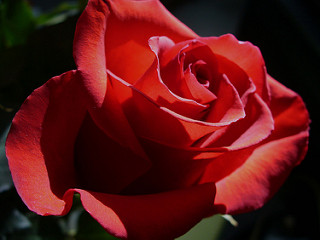

In [28]:
img

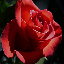

In [29]:
img=image.load_img(r'C:\Users\uma25\Desktop\data_for_ibm\Flowers-Dataset\flowers\rose/394990940_7af082cf8d_n.jpg',target_size=(64,64))
img

In [30]:
x=image.img_to_array(img)
x

array([[[ 4., 14.,  3.],
        [ 4., 15.,  0.],
        [ 7., 10.,  3.],
        ...,
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 3.,  3.,  3.]],

       [[21., 37.,  8.],
        [ 7., 18.,  1.],
        [ 5., 11.,  1.],
        ...,
        [ 1.,  1.,  3.],
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.]],

       [[15., 34.,  4.],
        [ 5., 18.,  0.],
        [ 6., 14.,  3.],
        ...,
        [ 1.,  2.,  4.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       ...,

       [[ 7., 11., 10.],
        [ 7., 16., 15.],
        [17., 23., 21.],
        ...,
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 0.,  0.,  0.]],

       [[ 9., 18., 15.],
        [ 2.,  7.,  3.],
        [ 5., 11.,  7.],
        ...,
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[18., 26., 28.],
        [ 0., 10.,  2.],
        [ 8., 14., 10.],
        ...,
        [ 2.,  6.,  9.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]

In [31]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 4., 14.,  3.],
         [ 4., 15.,  0.],
         [ 7., 10.,  3.],
         ...,
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 3.,  3.,  3.]],

        [[21., 37.,  8.],
         [ 7., 18.,  1.],
         [ 5., 11.,  1.],
         ...,
         [ 1.,  1.,  3.],
         [ 1.,  1.,  1.],
         [ 2.,  2.,  2.]],

        [[15., 34.,  4.],
         [ 5., 18.,  0.],
         [ 6., 14.,  3.],
         ...,
         [ 1.,  2.,  4.],
         [ 0.,  0.,  0.],
         [ 1.,  1.,  1.]],

        ...,

        [[ 7., 11., 10.],
         [ 7., 16., 15.],
         [17., 23., 21.],
         ...,
         [ 1.,  1.,  1.],
         [ 2.,  2.,  2.],
         [ 0.,  0.,  0.]],

        [[ 9., 18., 15.],
         [ 2.,  7.,  3.],
         [ 5., 11.,  7.],
         ...,
         [ 0.,  0.,  0.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[18., 26., 28.],
         [ 0., 10.,  2.],
         [ 8., 14., 10.],
         ...,
         [ 2.,  6.,  9.],
        

In [32]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 74ms/step


array([2], dtype=int64)

In [33]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [34]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [35]:
index[y[0]]

'rose'